### Heart Disease UCI dataset

In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [62]:
# load the data 
df = pd.read_csv("../data/heart.csv") 
df.head()
# df.shape

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [64]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Check for missing values

In [66]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Data Exploration

Number of people without disease: 138
Number of people with disease: 165



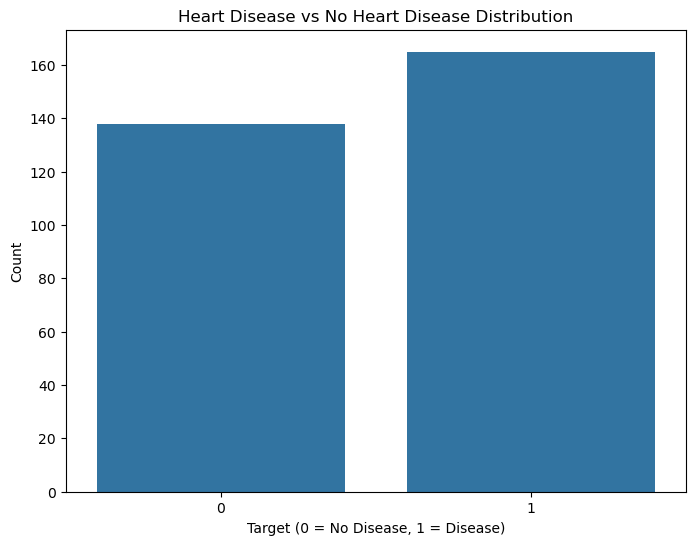

In [67]:
# Count the number of people with and without heart disease
no_disease = sum(df['target'] == 0)
disease = sum(df['target'] == 1)

# Print the counts
print(f"Number of people without disease: {no_disease}") 
print(f"Number of people with disease: {disease}\n")

# Create a countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='target', data=df)

# Customize the plot
plt.xlabel("Target (0 = No Disease, 1 = Disease)") 
plt.ylabel("Count") 
plt.title("Heart Disease vs No Heart Disease Distribution")
plt.show()

<Figure size 1200x1000 with 0 Axes>

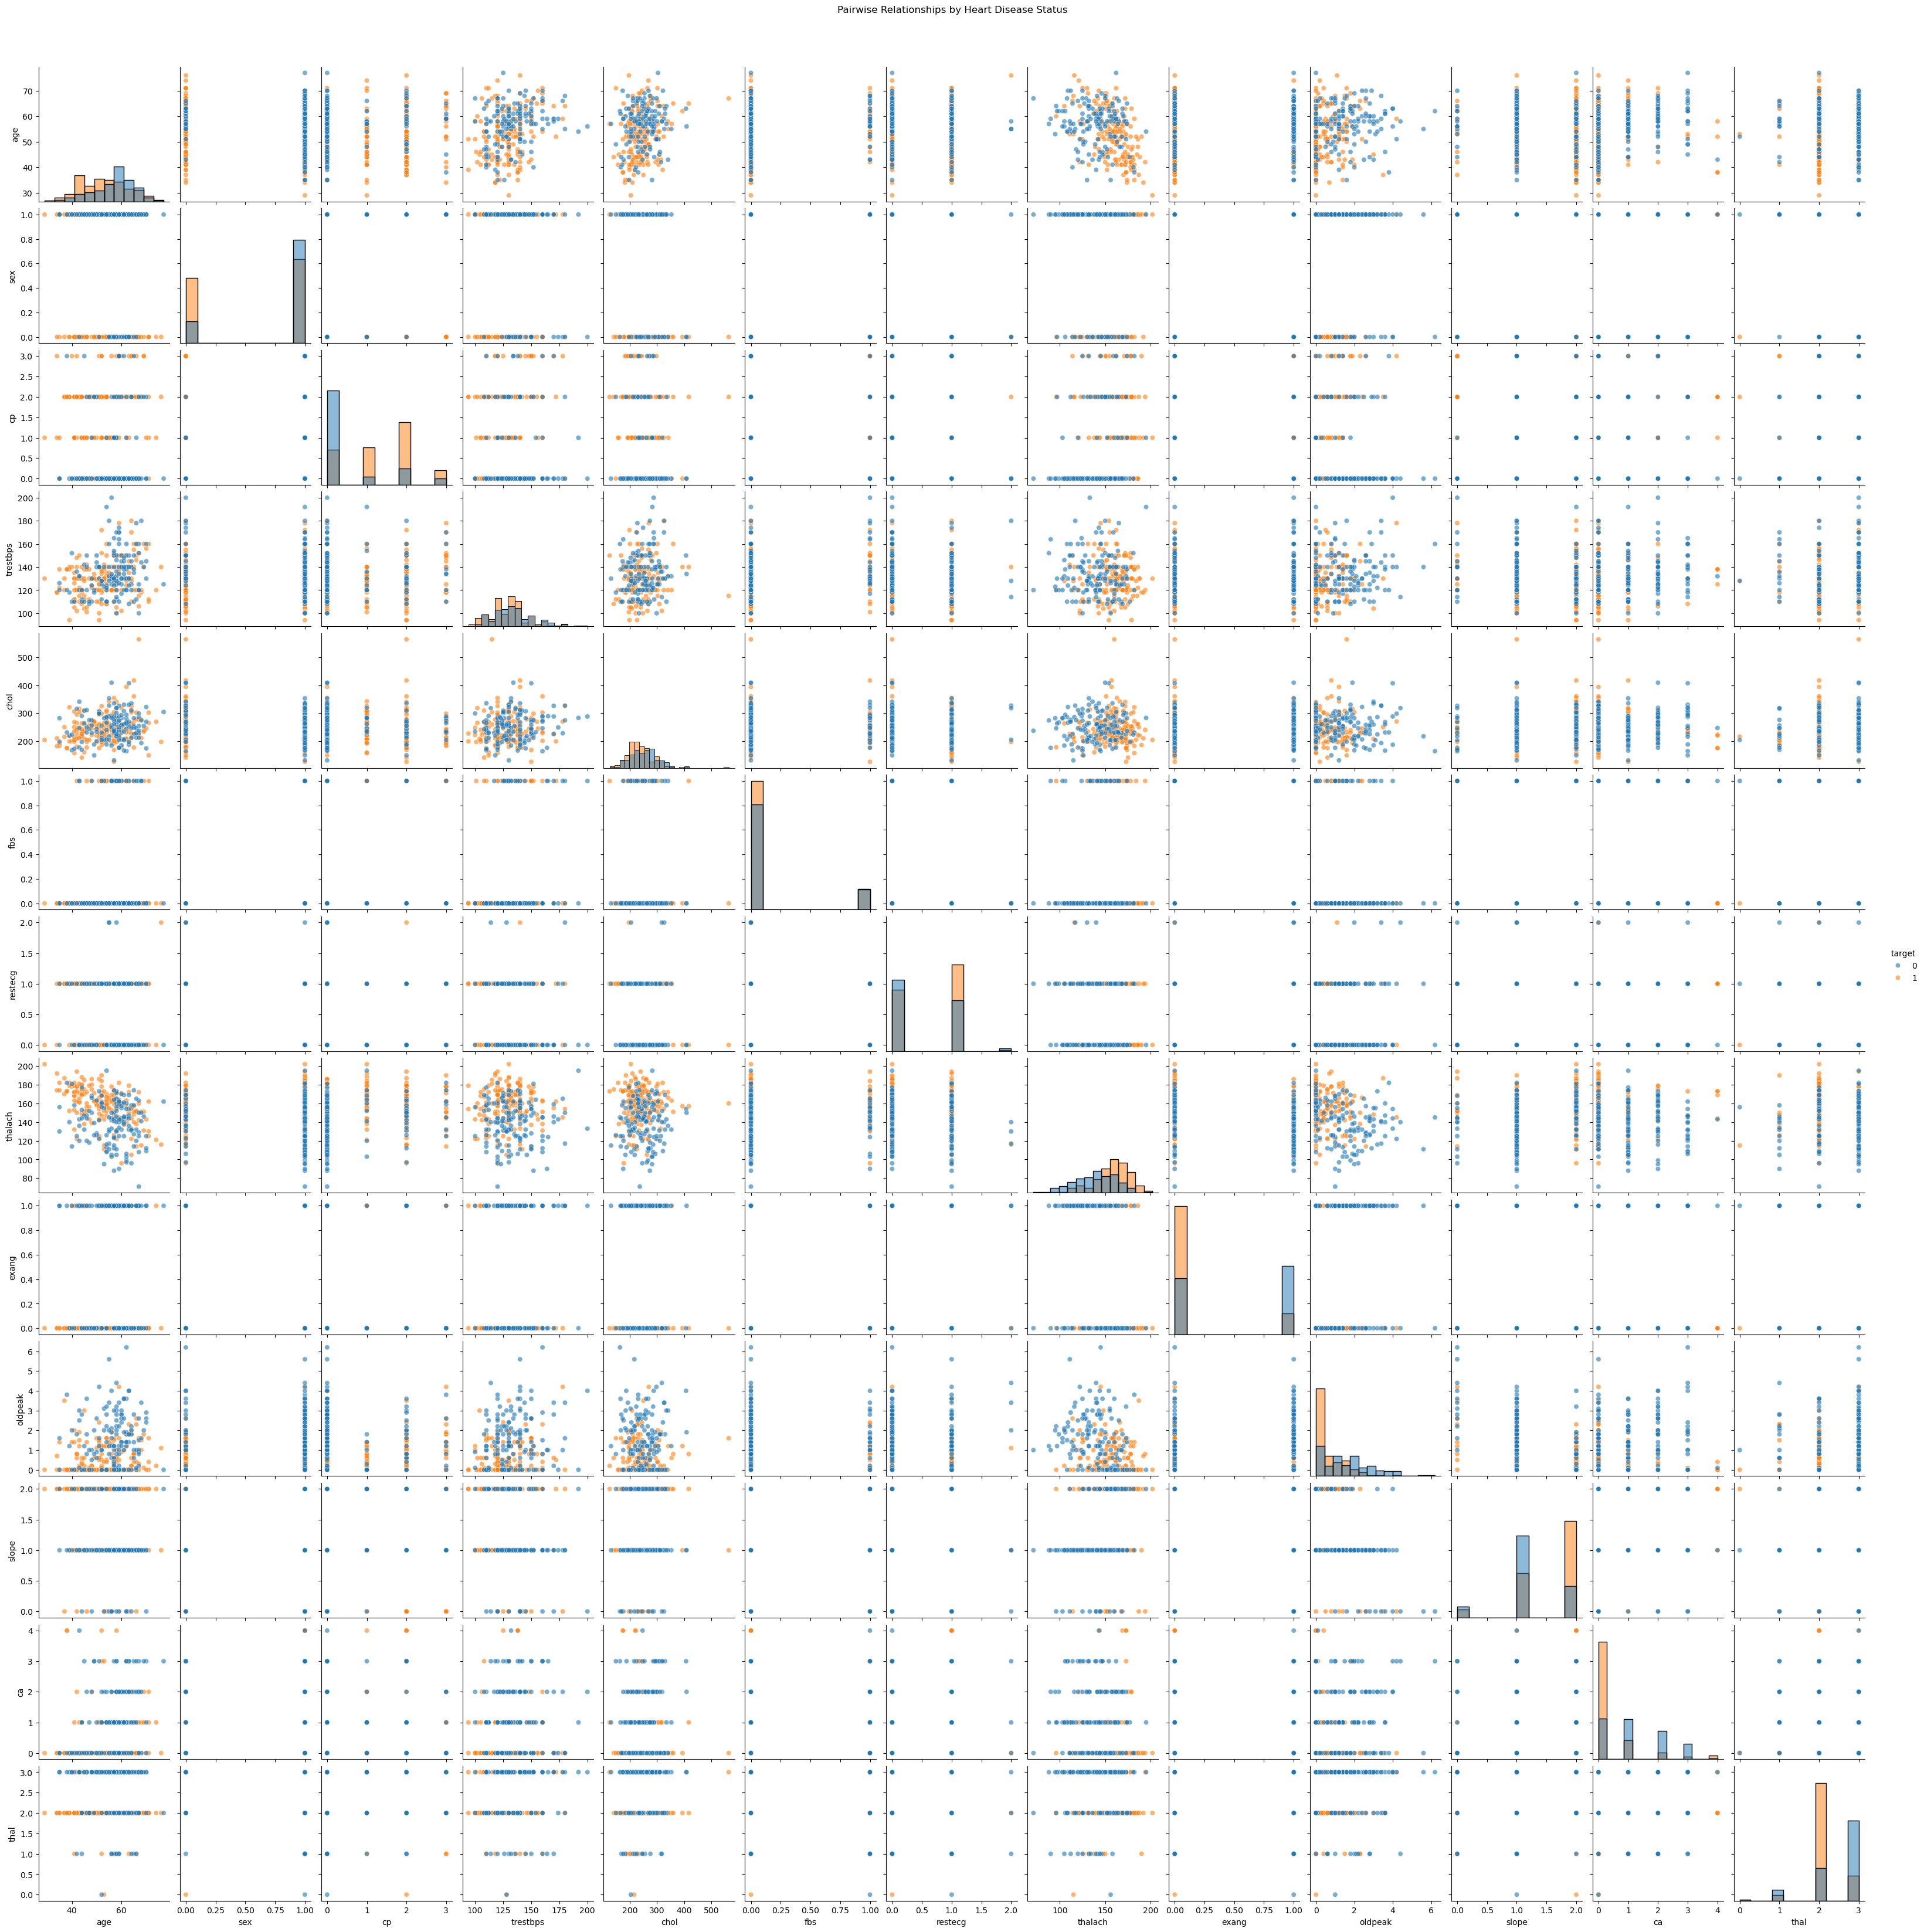

In [68]:
# Ploting the pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(df, 
             hue='target',
             diag_kind='hist',  # You can use 'hist' or 'kde'
             plot_kws={'alpha': 0.6},
             corner=False)  # Set to True to show only lower triangle

plt.suptitle('Pairwise Relationships by Heart Disease Status', y=1.02)
plt.show()


Handling and visualising the numerical features


In [70]:
numeric_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
category_col = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca']

for col in numeric_col : 
    print(f"\nvalue counts for {col} : \n{df[col].value_counts()}")



value counts for age : 
age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64

value counts for trestbps : 
trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: count, dtype: int64

value counts for cho

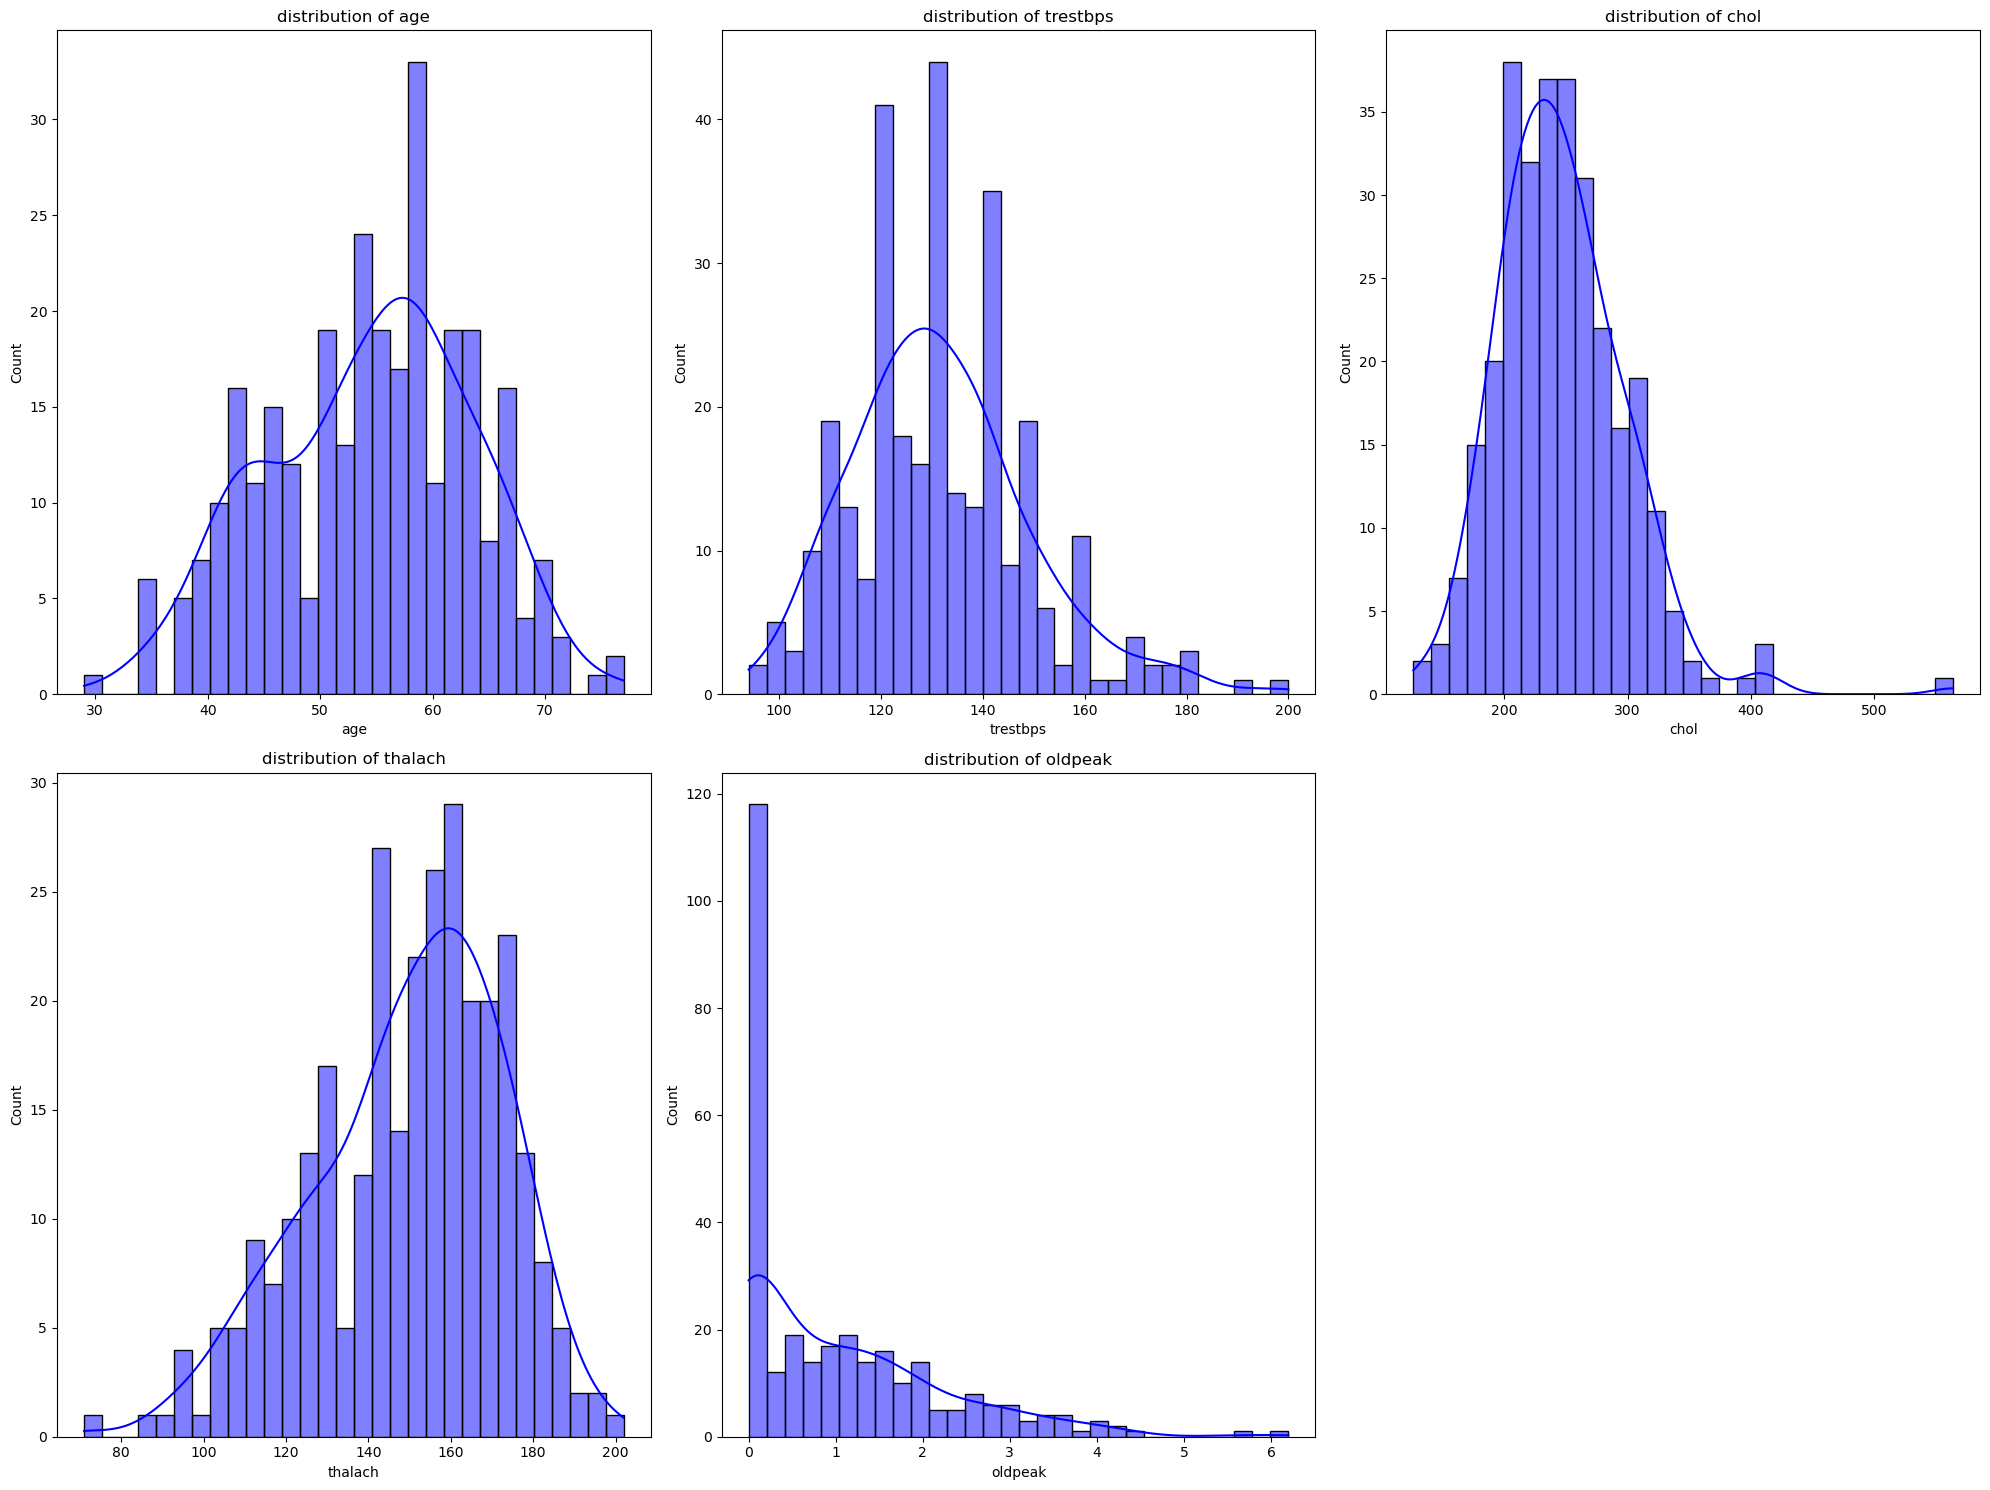

In [72]:
plt.figure(figsize=(20,15)) 
for  i , col in enumerate(numeric_col) : 
    plt.subplot(2 , 3 , i+1) 
    sns.histplot(df[col] , kde=True , bins=30 ,color='blue') 
    plt.title(f"distribution of {col}") 

plt.tight_layout() 
plt.show()

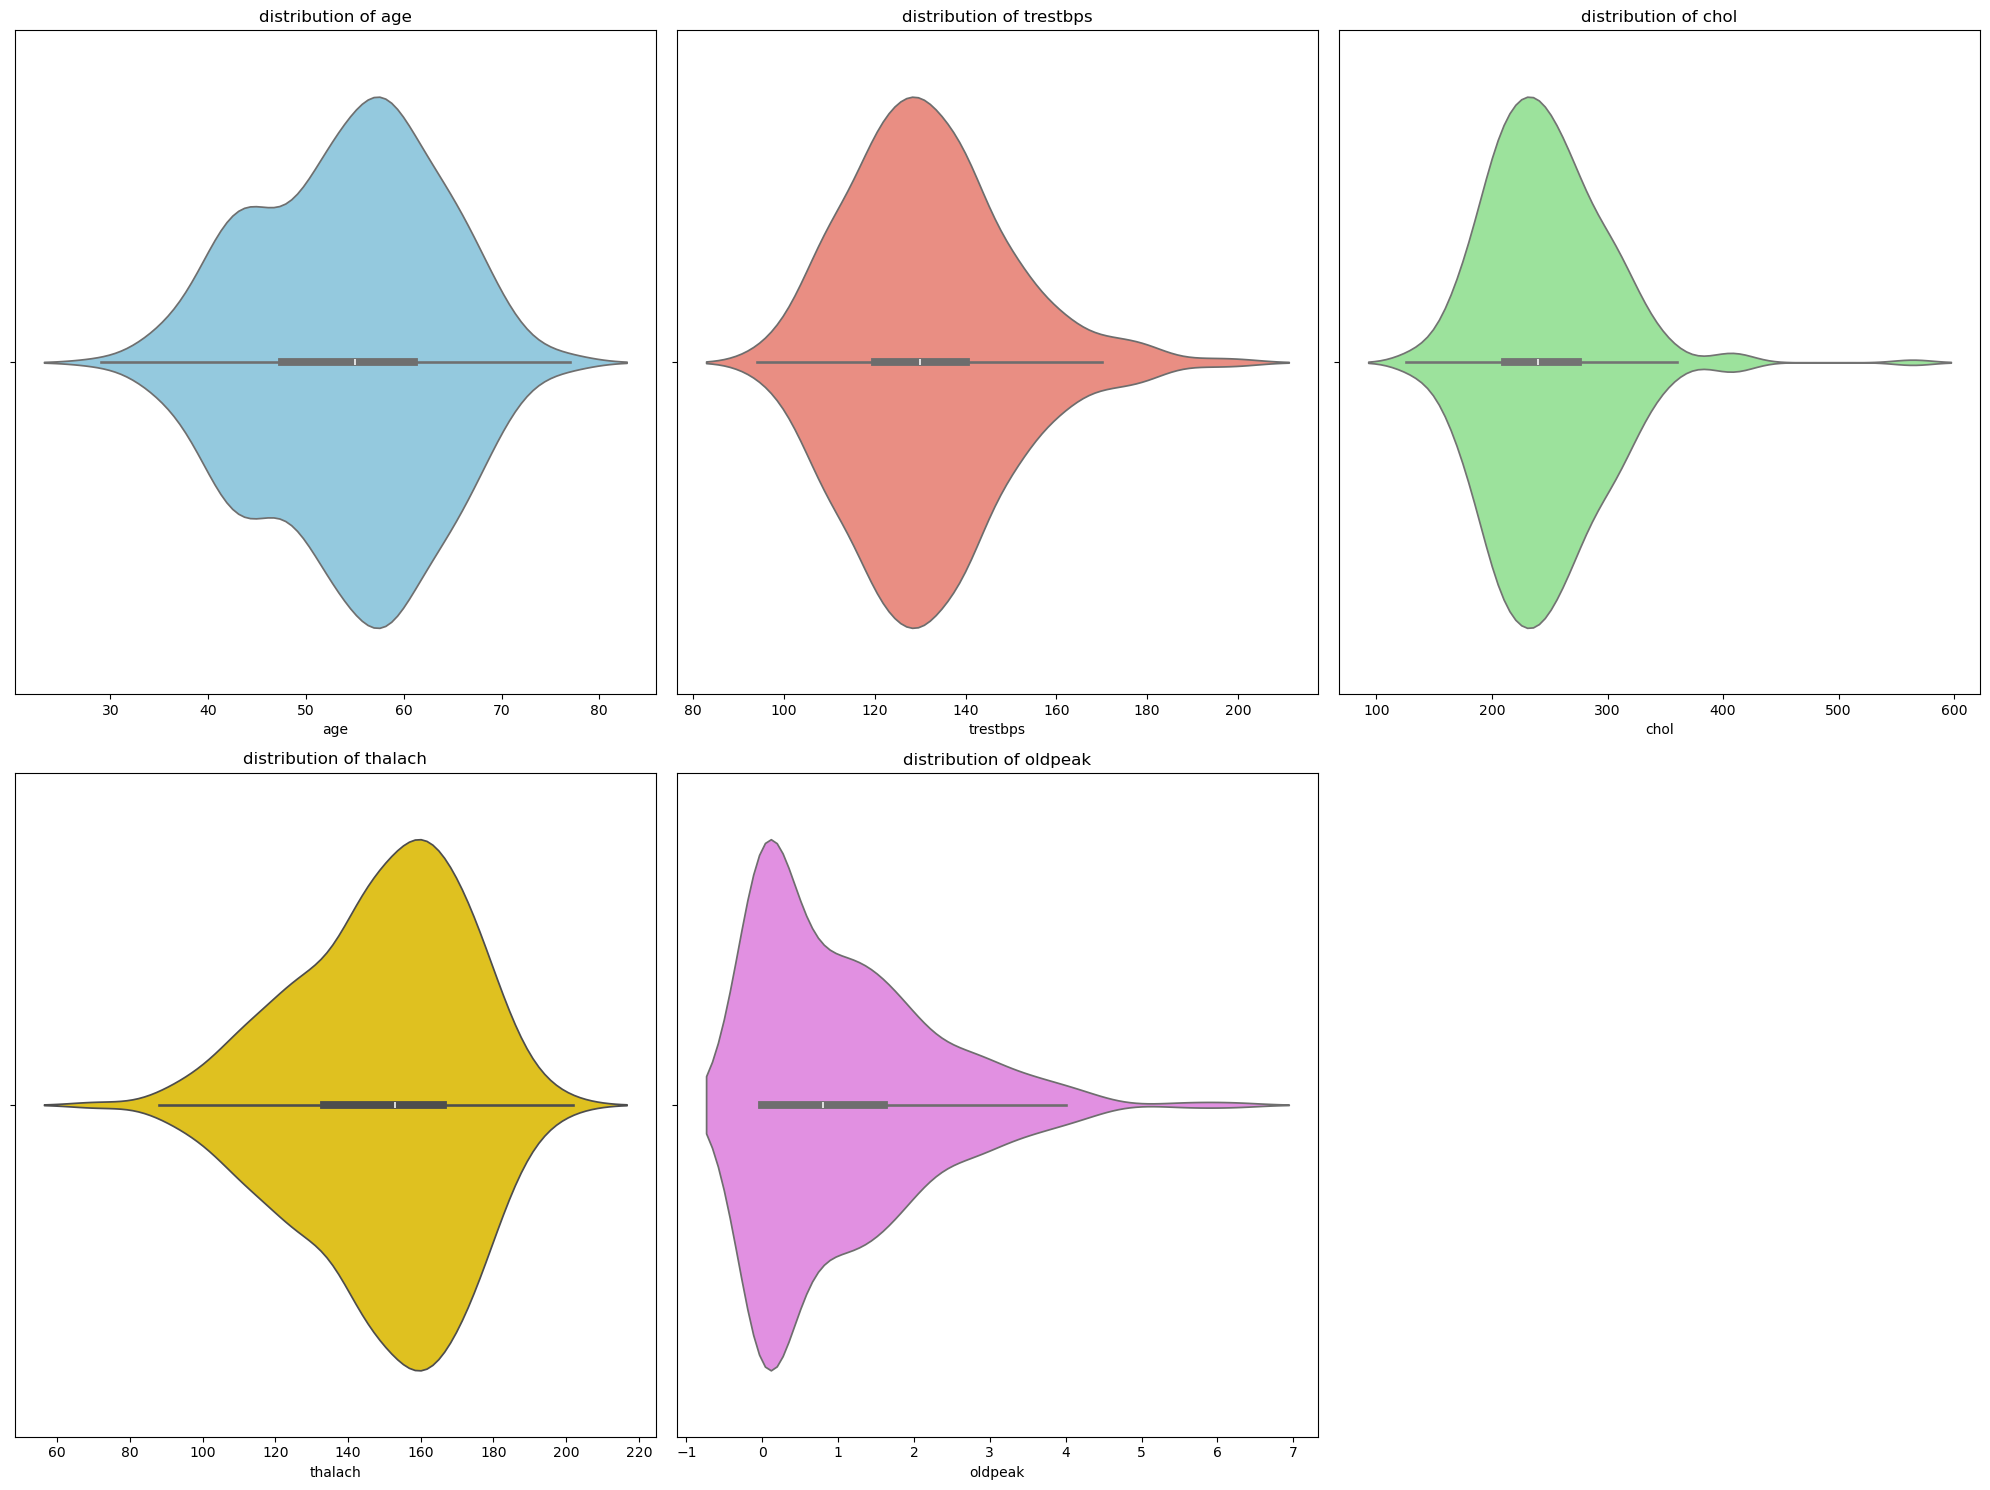

In [74]:
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'violet', 'orange', 'pink', 'cyan', 'lime']
plt.figure(figsize=(20,15)) 
for  i , col in enumerate(numeric_col) : 
    plt.subplot(2 , 3 , i+1) 
    sns.violinplot(x=df[col] ,color=colors[i])
    plt.title(f"distribution of {col}") 

plt.tight_layout() 
plt.show()

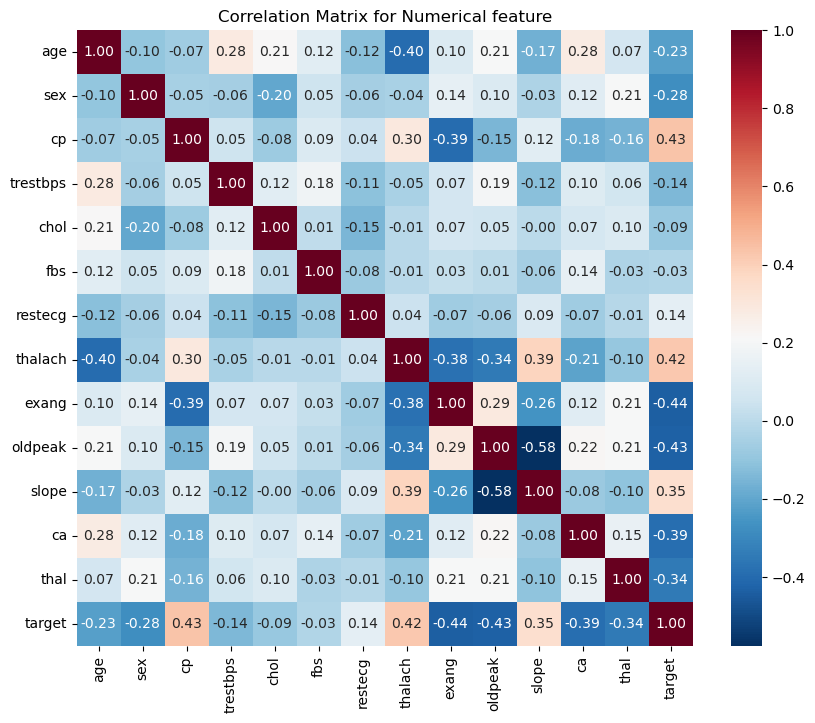

In [75]:
plt.figure(figsize=(10,8)) 
sns.heatmap(df.corr(numeric_only = True) , annot=True , fmt=".2f" , cmap="RdBu_r" , square=True) 

plt.title("Correlation Matrix for Numerical feature") 
plt.show()

Outlier analysis

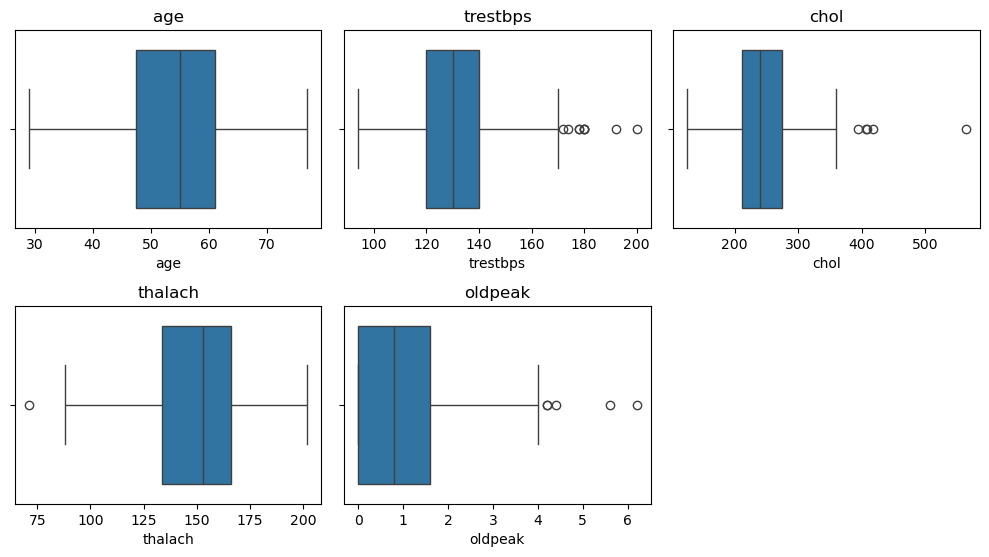

In [78]:
plt.figure(figsize=(10,8)) 
for i , col in enumerate(numeric_col) : 
    plt.subplot(3,3 , i+1) 
    sns.boxplot(x=df[col]) 
    plt.title(f"{col}") 

plt.tight_layout() 
plt.show()

In [81]:
df[numeric_col].skew()

age        -0.202463
trestbps    0.713768
chol        1.143401
thalach    -0.537410
oldpeak     1.269720
dtype: float64

Handling and visualising the Categorical features

In [84]:
print(df.columns.tolist())
for col in [c for c in category_col if c in df.columns] : 
    print(f"\nValues counr for {col} :\n{df[col].value_counts()}")


['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Values counr for sex :
sex
1    207
0     96
Name: count, dtype: int64

Values counr for cp :
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

Values counr for fbs :
fbs
0    258
1     45
Name: count, dtype: int64

Values counr for restecg :
restecg
1    152
0    147
2      4
Name: count, dtype: int64

Values counr for exang :
exang
0    204
1     99
Name: count, dtype: int64

Values counr for slope :
slope
2    142
1    140
0     21
Name: count, dtype: int64

Values counr for ca :
ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64


C:\Users\Ahmed Sherif\AppData\Local\Temp\ipykernel_13388\703757092.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Ahmed Sherif\AppData\Local\Temp\ipykernel_13388\703757092.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Ahmed Sherif\AppData\Local\Temp\ipykernel_13388\703757092.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Ahmed Sherif\AppData\Local\Temp\ipykernel_13388\703757092.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legen

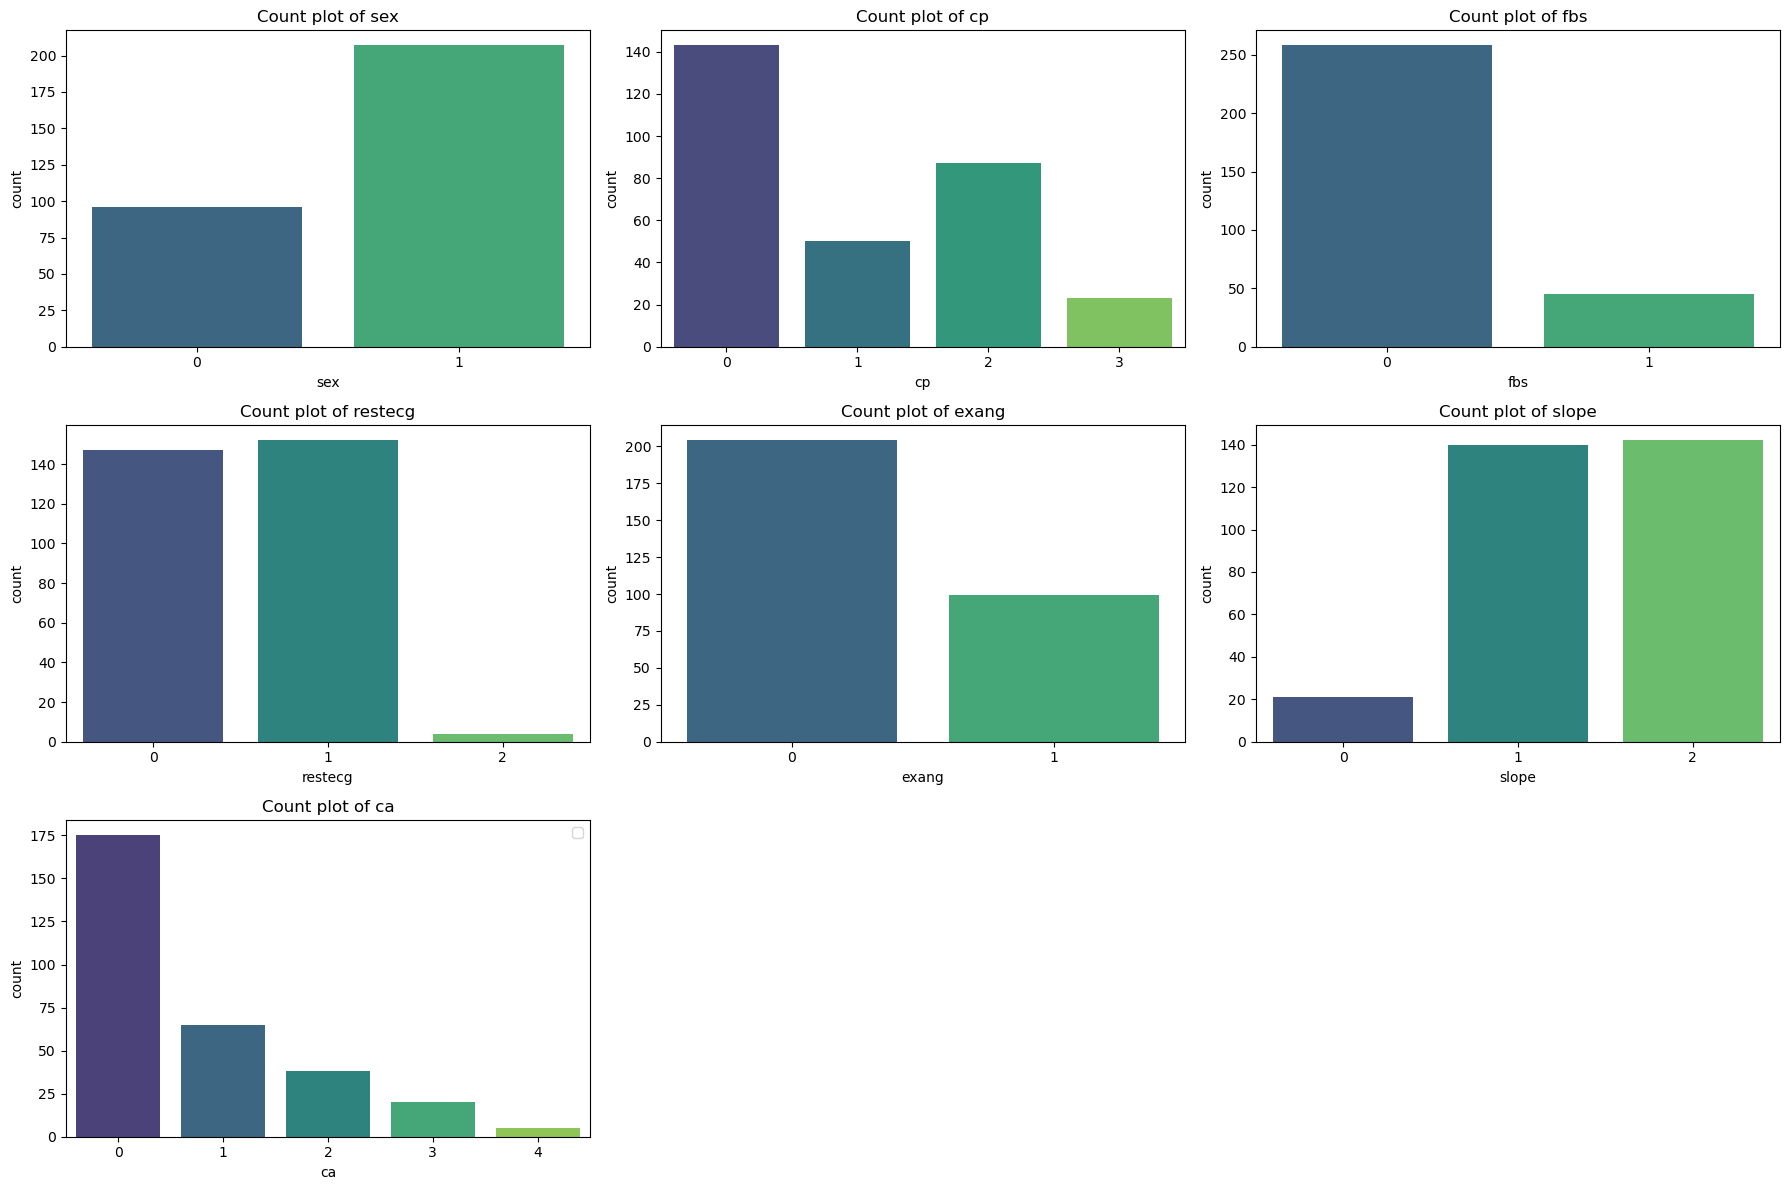

In [85]:
plt.figure(figsize=(18,12)) 
for i , col in enumerate(category_col) : 
    plt.subplot(3 , 3 , i+1)
    sns.countplot(x=col , data=df , palette='viridis') 
    plt.title(f'Count plot of {col}') 

plt.tight_layout()
plt.legend() 
plt.show()


Handling and visualizing the Target features "Num" that represents the heart disease


In [88]:
df[numeric_col + ['target']].corr()['target'].sort_values(ascending=False)

target      1.000000
thalach     0.421741
chol       -0.085239
trestbps   -0.144931
age        -0.225439
oldpeak    -0.430696
Name: target, dtype: float64

In [89]:
target_count = df['target'].value_counts().sort_index() 
print(target_count) 

target_percebtage = (target_count / target_count.sum()) * 100 
print(target_percebtage)

target
0    138
1    165
Name: count, dtype: int64
target
0    45.544554
1    54.455446
Name: count, dtype: float64


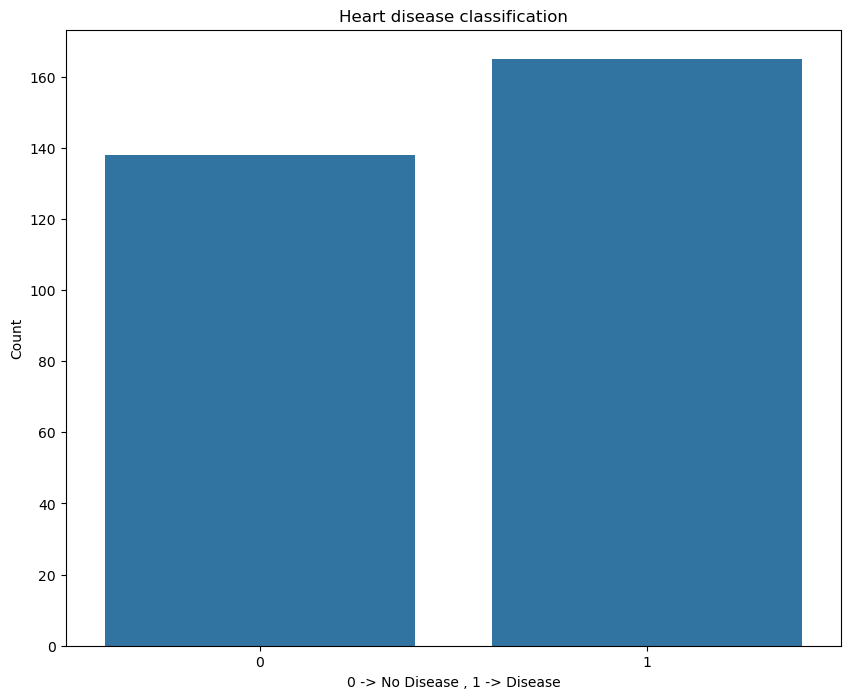

In [90]:
plt.figure(figsize=(10,8)) 
sns.countplot(x='target' , data=df)

# Add labels to each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=9)

plt.title("Heart disease classification") 
plt.xlabel("0 -> No Disease , 1 -> Disease") 
plt.ylabel("Count") 
plt.show()

C:\Users\Ahmed Sherif\AppData\Local\Temp\ipykernel_13388\3278507658.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Ahmed Sherif\AppData\Local\Temp\ipykernel_13388\3278507658.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Ahmed Sherif\AppData\Local\Temp\ipykernel_13388\3278507658.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Ahmed Sherif\AppData\Local\Temp\ipykernel_13388\3278507658.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `l

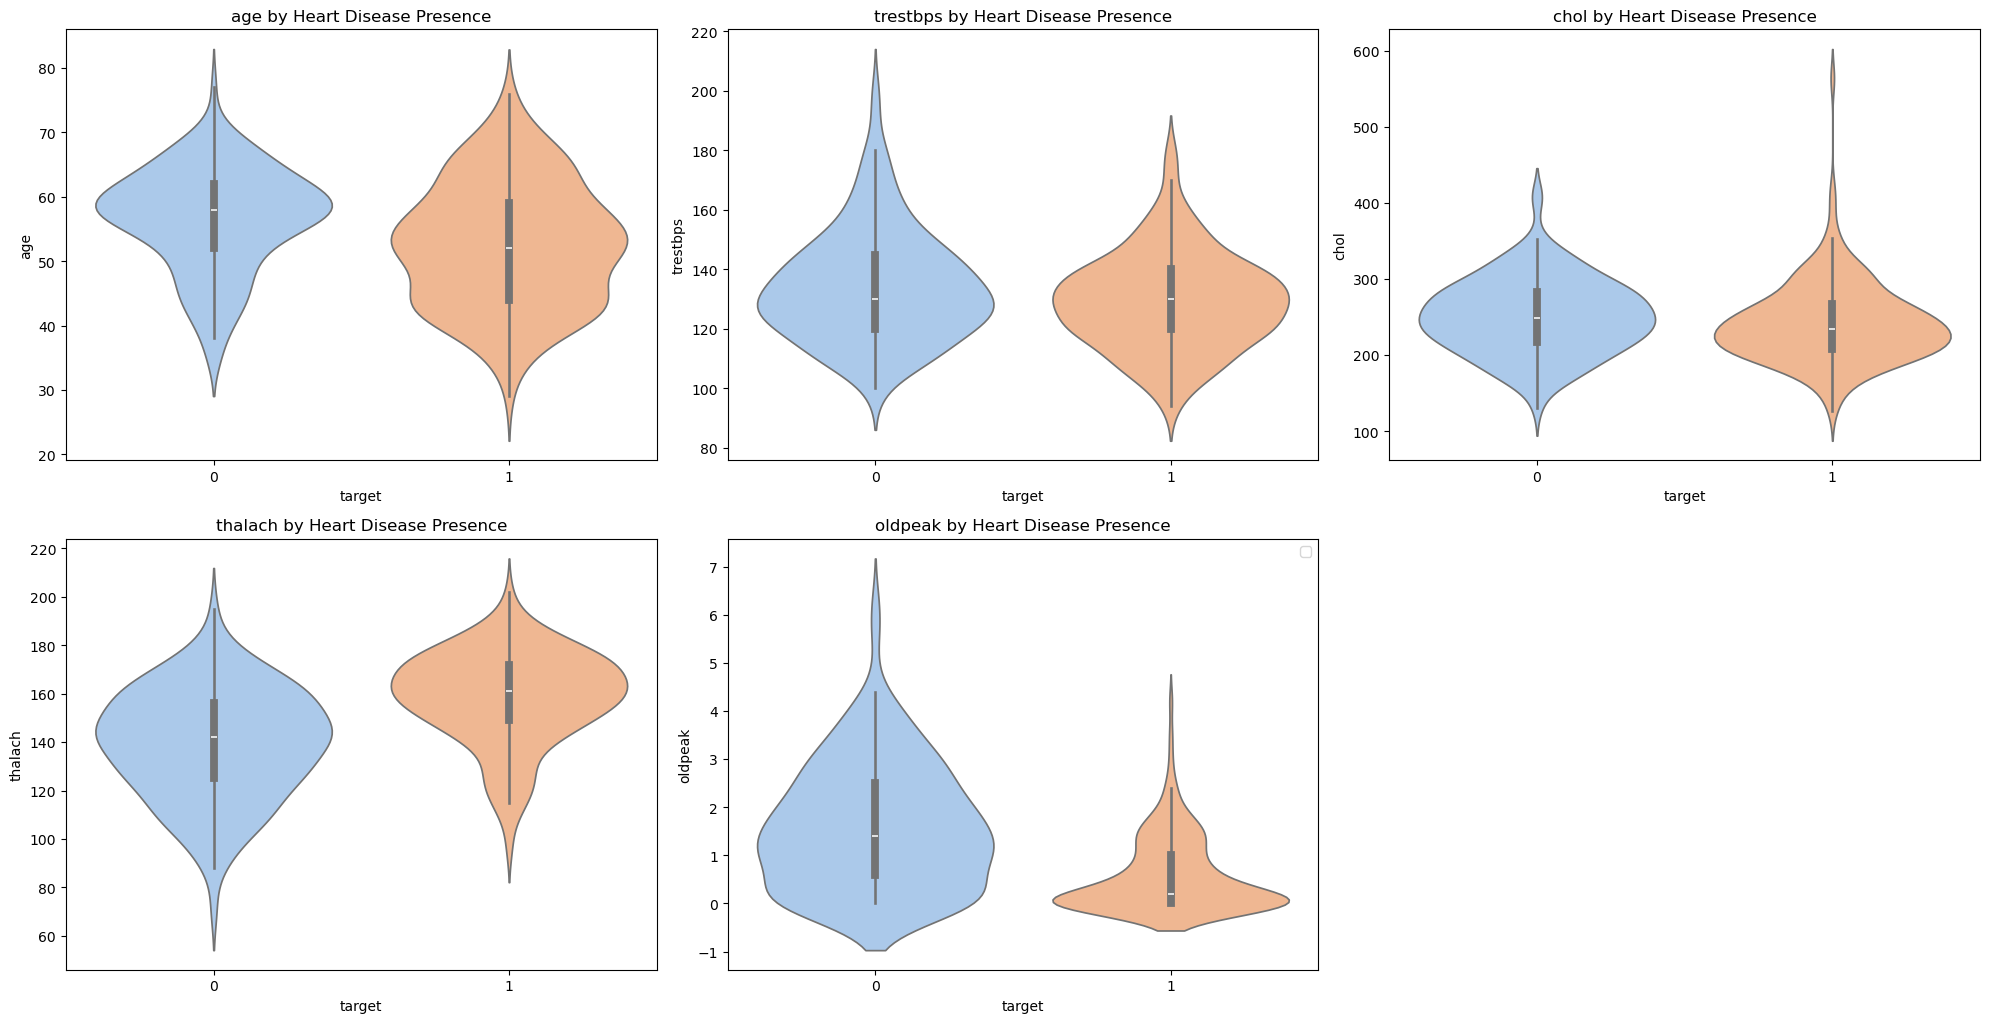

In [91]:
plt.figure(figsize=[20,15]) 
for  i , col in enumerate(numeric_col) : 
    plt.subplot(3,3 , i+1) 
    sns.violinplot(data=df , x='target' , y=col , palette='pastel') 
    plt.title(f"{col} by Heart Disease Presence")

plt.tight_layout() 
plt.legend() 
plt.show()

T-Test for Numerical Colums

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
print("T-test for numerical colums: \n") 

for col in numeric_col :
    group0 = df[df['target'] == 0][col] 
    group1 = df[df['target'] == 1][col] 
    state ,p = ttest_ind(group0 , group1 , nan_policy='omit')

    print(f"{col} : p-values = {p:.4f} {'(Significant)' if p < 0.05 else '(Not significant)'}")
    

T-test for numerical colums: 

age : p-values = 0.0001 (Significant)
trestbps : p-values = 0.0115 (Significant)
chol : p-values = 0.1388 (Not significant)
thalach : p-values = 0.0000 (Significant)
oldpeak : p-values = 0.0000 (Significant)


Chi-square Test for Categorical Cloumns

In [ ]:
from scipy.stats import chi2_contingency 
print("Chi-square test for categorical data \n") 
for col in category_col : 
    table = pd.crosstab(df[col] , df['target']) 
    state ,p , _ ,_ = chi2_contingency(table) 
    print(f"{col} : p-values = {p:.4f} {'(Significant)' if p < 0.05 else '(Not significant)'}")


Chi-square test for categorical data 

sex : p-values = 0.0000 (Significant)
cp : p-values = 0.0000 (Significant)
fbs : p-values = 0.7444 (Not significant)
restecg : p-values = 0.0067 (Significant)
exang : p-values = 0.0000 (Significant)
slope : p-values = 0.0000 (Significant)
ca : p-values = 0.0000 (Significant)


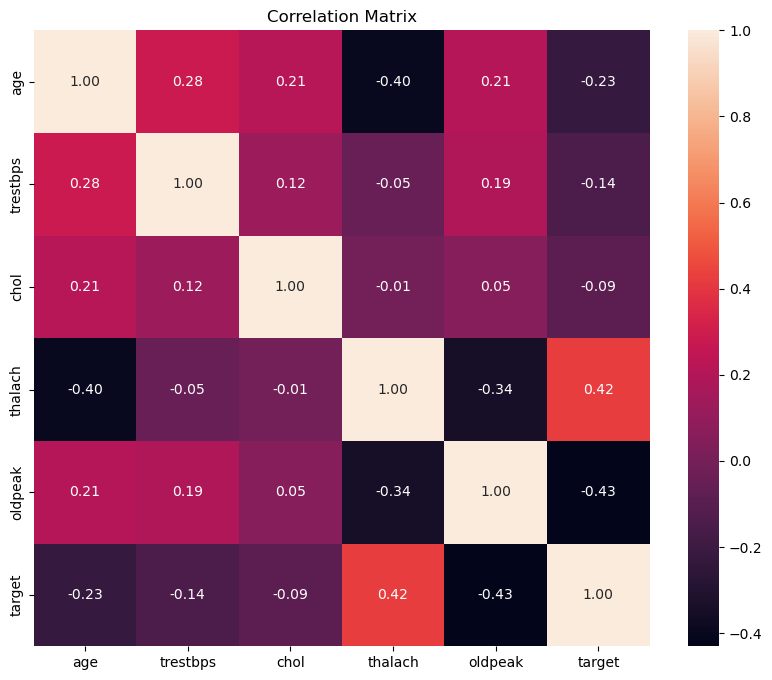

In [ ]:
# Corrleation Matrix 
plt.figure(figsize=(10 ,8)) 
sns.heatmap(df[numeric_col + ['target']].corr() , annot=True , fmt=".2f" , square=True)
plt.title("Correlation Matrix") 
plt.show()

Analyzing the Age colums

In [ ]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

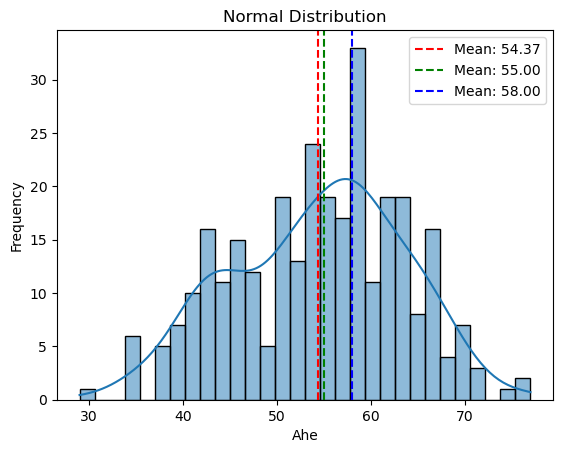

In [ ]:
sns.histplot(df['age'] , kde=True , bins=30)
plt.axvline(df['age'].mean() , color = 'red' , linestyle="--" , label=f"Mean: {df['age'].mean():.2f}")
plt.axvline(df['age'].median() , color = 'green' , linestyle="--" , label=f"Mean: {df['age'].median():.2f}")
plt.axvline(df['age'].mode()[0] , color = 'blue' , linestyle="--" , label=f"Mean: {df['age'].mode()[0]:.2f}")

plt.title("Normal Distribution") 
plt.legend() 
plt.xlabel("Ahe") 
plt.ylabel("Frequency") 
plt.show()

C:\Users\Ahmed Sherif\AppData\Local\Temp\ipykernel_13388\778198754.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target' , y='age' , data=df , palette='Set2')


Text(0.5, 1.0, 'Age and disease')

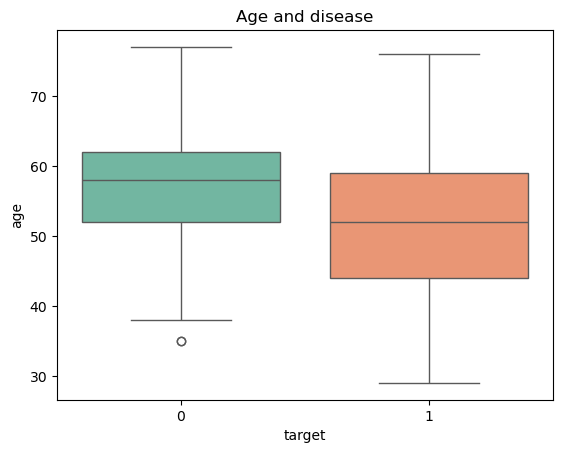

In [ ]:
sns.boxplot(x='target' , y='age' , data=df , palette='Set2') 
plt.title("Age and disease")

Text(0.5, 1.0, 'Age vs Max heart rate by target')

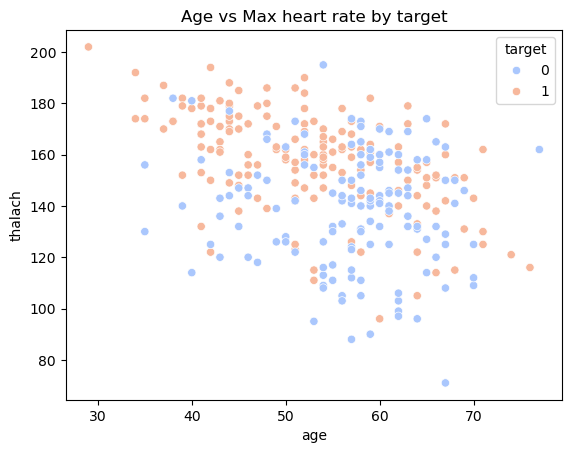

In [ ]:
sns.scatterplot(x='age' , y='thalach' , hue='target' , data=df , palette='coolwarm') 
plt.title("Age vs Max heart rate by target")

In [53]:
import plotly.express as px
fig = px.histogram(data_frame = df , x ='age' , color='sex') 
fig.show()

In [ ]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

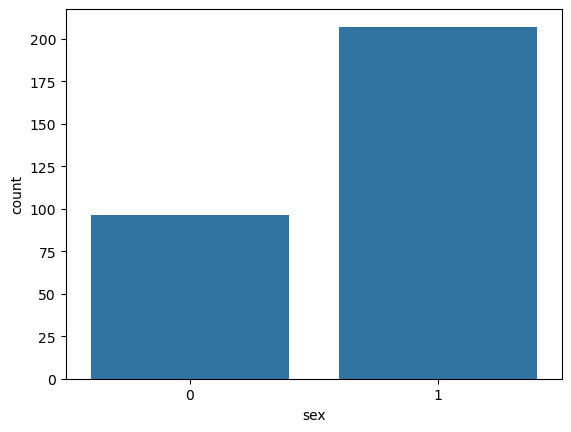

In [ ]:
sns.countplot(df , x ='sex')

In [ ]:
male_count = 207 
female_count = 96 

total = male_count + female_count 
male_percentage = (male_count/ total ) *100 
print(f"The Percentage of males is : {male_percentage:.2f}") 

female_percentage = (female_count/ total ) *100 
print(f"The Percentage of female is : {female_percentage:.2f}")

difference_percentage = ((male_count - female_count)/female_count) *100 
print(f"Males are {difference_percentage:.2f} more thean female in the data.")

The Percentage of males is : 68.32
The Percentage of female is : 31.68
Males are 115.62 more thean female in the data.


In [47]:
df.groupby('sex')['age'].value_counts()

sex  age
0    62     7
     58     6
     54     5
     63     5
     41     4
           ..
1    69     2
     29     1
     34     1
     37     1
     77     1
Name: count, Length: 73, dtype: int64


Exploring CP (Chest Pain) column¶


In [48]:
df['cp'].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

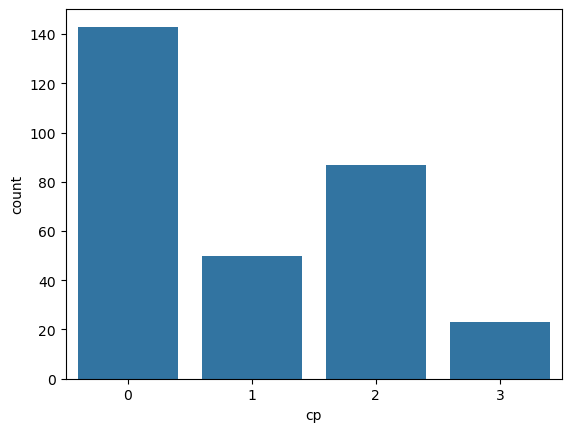

In [49]:
sns.countplot(df , x='cp')

<Axes: xlabel='cp', ylabel='count'>

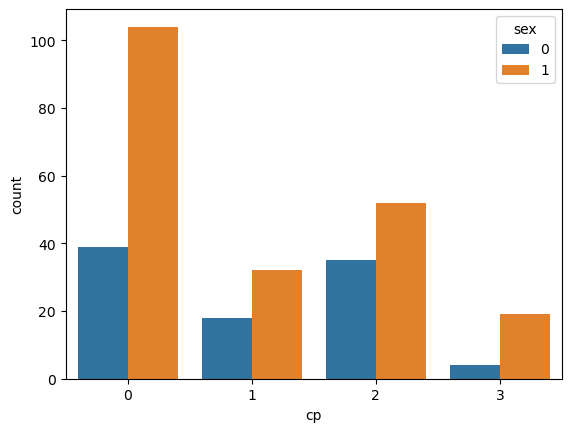

In [50]:
sns.countplot(df , x='cp' , hue='sex')

In [54]:
fig = px.histogram(data_frame=df , x='age' , color='cp')
fig.show()


Explore the trestbps (resting blood pressure) column:¶


In [55]:
df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

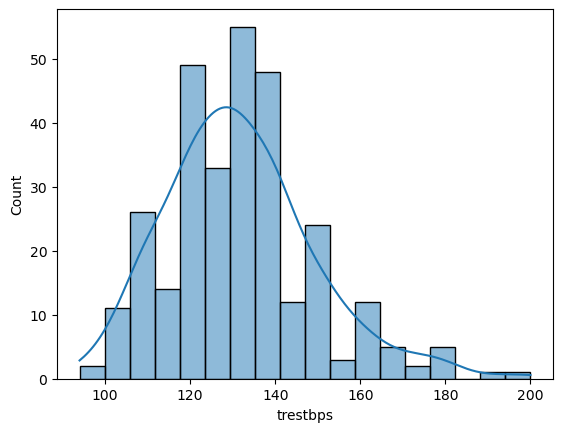

In [56]:
sns.histplot(data=df , x ='trestbps' , kde=True)

<Axes: xlabel='trestbps', ylabel='Count'>

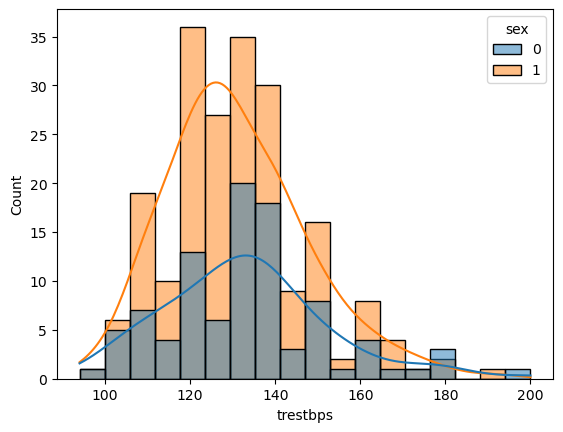

In [57]:
sns.histplot(data=df , x ='trestbps' , kde=True , hue='sex')

In [58]:
(df.isnull().sum()).sort_values(ascending=False)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
